Welcome to Salary Prediction System
Press ENTER key to proceed


0 ... datasetSalary.csv


Select file to create ML model:  0


datasetSalary.csv is selected
Reading csv file
Creating Dataset
Dataset created


Enter test data size (between 0 and 1):  0.4


Model creation in progression
Model is created
Press ENTER key to predict test data in trained model


[[6. ]
 [4.9]
 [5.1]
 [4. ]
 [3.2]
 [2.2]
 [1.5]
 [3.2]
 [4.1]
 [7.1]
 [8.7]
 [7.9]] ... [ 93940  67938  66029  55794  54445  39891  37731  64445  57081  98273
 109431 101302] ... [ 82930.89436148  72952.01615267  74766.35764518  64787.47943637
  57530.11346633  48458.40600378  42108.21077999  57530.11346633
  65694.65018263  92909.77257029 107424.50451037 100167.13854033]
[6.] ... 93940 ... 82930.8943614773
[4.9] ... 67938 ... 72952.0161526695
[5.1] ... 66029 ... 74766.35764518002
[4.] ... 55794 ... 64787.47943637221
[3.2] ... 54445 ... 57530.11346633018
[2.2] ... 39891 ... 48458.40600377762
[1.5] ... 37731 ... 42108.21077999084
[3.2] ... 64445 ... 57530.11346633018
[4.1] ... 57081 ... 65694.65018262746
[7.1] ... 98273 ... 92909.7725702851
[8.7] ... 109431 ... 107424.50451036918
[7.9] ... 101302 ... 100167.13854032714
Press ENTER key to see above result in graphical format


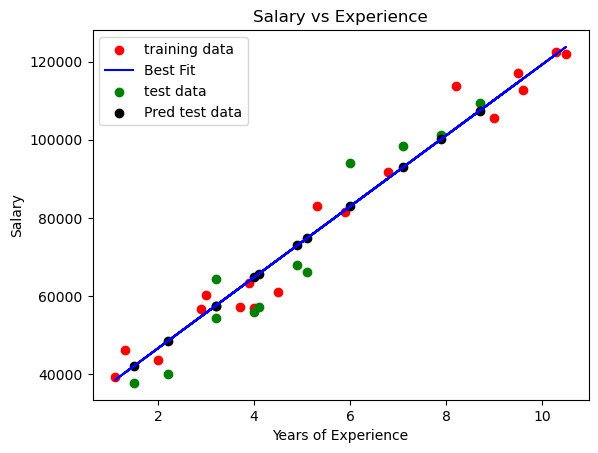

Our model is 91.38% accurate
Now you can predict salary of an employee using our model

Enter experience in years of the candidates, seperated by comma: 


 1,34,3,6,9,10


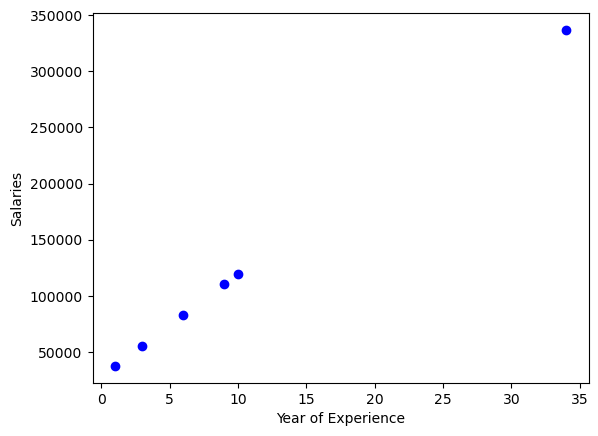

   Experience       Salaries
0         1.0   37572.357049
1        34.0  336938.703313
2         3.0   55715.771974
3         6.0   82930.894361
4         9.0  110146.016749
5        10.0  119217.724212

Press ENTER key to end


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  

def welcome():
    print("Welcome to Salary Prediction System")
    print("Press ENTER key to proceed")
    input()

def checkcsv():
    csv_files = []
    cur_dir = os.getcwd()  
    content_list = os.listdir(cur_dir)
    for x in content_list:
        if x.split('.')[-1] == 'csv':
            csv_files.append(x)
    if len(csv_files) == 0:
        return 'No csv file in the directory'
    else:
        return csv_files
def display_and_select_csv(csv_files):
    i = 0
    for file_name in csv_files:
        print(i, '...', file_name)
        i += 1

    return csv_files[int(input("Select file to create ML model: "))]  

def graph(X_train, y_train, regressionObject, X_test, y_test, y_pred):
    plt.scatter(X_train, y_train, color='red', label='training data')  
    plt.plot(X_train, regressionObject.predict(X_train), color='blue', label='Best Fit')  
    plt.scatter(X_test, y_test, color='green', label='test data')  
    plt.scatter(X_test, y_pred, color='black', label='Pred test data')  
    plt.title("Salary vs Experience")  
    plt.xlabel("Years of Experience")  
    plt.ylabel("Salary")  
    plt.legend()  
    plt.show()  

def main():
    welcome()
    try:
        csv_file = checkcsv()
        if csv_file == "No csv file in the directory":
            raise FileNotFoundError("No csv file in the directory")
        csv_file = display_and_select_csv(csv_file)
        print(csv_file, 'is selected')
        print('Reading csv file')
        print('Creating Dataset')
        dataset = pd.read_csv(csv_file)
        print('Dataset created')
        X = dataset.iloc[:, :-1].values
        Y = dataset.iloc[:, -1].values
        s = float(input('Enter test data size (between 0 and 1): '))
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=s)
        print("Model creation in progression")
        regressionObject = LinearRegression()
        regressionObject.fit(X_train, Y_train)
        print("Model is created")
        print("Press ENTER key to predict test data in trained model")
        input()

        Y_pred = regressionObject.predict(X_test)
        i = 0
        print(X_test, '...', Y_test, '...', Y_pred)  
        while i < len(X_test):
            print(X_test[i], '...', Y_test[i], '...', Y_pred[i])
            i += 1

        print("Press ENTER key to see above result in graphical format")
        input()
        graph(X_train, Y_train, regressionObject, X_test, Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)
        print("Our model is %2.2f%% accurate" % (r2 * 100))

        print("Now you can predict salary of an employee using our model")
        print("\nEnter experience in years of the candidates, seperated by comma: ")
        exp = [float(e) for e in input().split(',')]
        ex = []
        for x in exp:
            ex.append([x])
        experience = np.array(ex)
        salaries = regressionObject.predict(experience)
        plt.scatter(experience, salaries, color='blue')
        plt.xlabel('Year of Experience')
        plt.ylabel('Salaries')
        plt.show()
        d = pd.DataFrame({'Experience': exp, 'Salaries': salaries})
        print(d)
        print("\nPress ENTER key to end")

    except FileNotFoundError:
        print("No csv file in the directory")
        print("Press ENTER key to exit")
        input()
        exit()
if __name__=="__main__":
    main()
    input()